# Part II - (Prosper Loan Analysis)
## by (Blessing Olayemi)


## Investigation Overview
The key insights of my presentation after my exploration analysis are as follows
1.  The demography of the borrowers.
2.  The employment status and ocupation of the borrowers.
3.  The ratio of homeowners to non home owners amongst the borrowers.
4.  The debt to income ratio.
5.  Relationship between income range and loan term
6.  The distribution of borrower's annual percentage rate.
7.  The difference between loan amount accessible to home ownwers and non-home owners.
 

## Dataset Overview

> The dataset is a loan dataset originally from kaggle. it is called the prosper loan dataset. It belongs to a San Francisco based company that is involved in peer-to-peer lending. The dataset consists of 113,937 loans with over 81 variables on each loan.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [4]:
# select variables of interest into a dataframe
prosper_loan = prosper[['BorrowerAPR', 'LoanOriginalAmount', 'ListingCreationDate', 'ClosedDate', 'Occupation', 'Term', 'ProsperRating (numeric)', 'CreditGrade', 'LoanOriginationDate', 'EmploymentStatus', 
                        'BorrowerState', 'IsBorrowerHomeowner', 'Investors', 'IncomeRange', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'ProsperScore', 'ProsperRating (Alpha)']] 

In [5]:
prosper_loan.T

,0,1,2,3,4,5,6,7,8,9,...,113927,113928,113929,113930,113931,113932,113933,113934,113935,113936
BorrowerAPR,0.16516,0.12016,0.28269,0.12528,0.24614,0.15425,0.31032,0.23939,0.0762,0.0762,...,0.07469,0.22362,0.30285,0.20053,0.15016,0.22354,0.1322,0.23984,0.28408,0.13189
LoanOriginalAmount,9425,10000,3001,10000,15000,15000,3000,10000,10000,10000,...,4292,2000,2500,3000,25000,10000,2000,10000,15000,2000
ListingCreationDate,2007-08-26 19:09:29.263000000,2014-02-27 08:28:07.900000000,2007-01-05 15:00:47.090000000,2012-10-22 11:02:35.010000000,2013-09-14 18:38:39.097000000,2013-12-14 08:26:37.093000000,2013-04-12 09:52:56.147000000,2013-05-05 06:49:27.493000000,2013-12-02 10:43:39.117000000,2013-12-02 10:43:39.117000000,...,2008-04-30 21:25:19.670000000,2011-06-06 19:02:44.443000000,2013-07-06 17:40:01.657000000,2013-07-08 10:24:49.700000000,2014-01-16 20:13:08.040000000,2013-04-14 05:55:02.663000000,2011-11-03 20:42:55.333000000,2013-12-13 05:49:12.703000000,2011-11-14 13:18:26.597000000,2014-01-15 09:27:37.657000000
ClosedDate,2009-08-14 00:00:00,NaN,2009-12-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2011-05-09 00:00:00,2011-09-19 00:00:00,2014-02-07 00:00:00,NaN,NaN,NaN,NaN,NaN,2013-08-13 00:00:00,NaN
Occupation,Other,Professional,Other,Skilled Labor,Executive,Professional,Sales - Retail,Laborer,Food Service,Food Service,...,Executive,Other,Accountant/CPA,Professional,Analyst,Food Service Management,Professional,Other,Food Service,Professor
Term,36,36,36,36,36,60,36,36,36,36,...,36,36,36,36,60,36,36,60,60,36
ProsperRating (numeric),NaN,6.0,NaN,6.0,3.0,5.0,2.0,4.0,7.0,7.0,...,NaN,4.0,2.0,5.0,5.0,4.0,6.0,3.0,4.0,6.0
CreditGrade,C,NaN,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LoanOriginationDate,2007-09-12 00:00:00,2014-03-03 00:00:00,2007-01-17 00:00:00,2012-11-01 00:00:00,2013-09-20 00:00:00,2013-12-24 00:00:00,2013-04-18 00:00:00,2013-05-13 00:00:00,2013-12-12 00:00:00,2013-12-12 00:00:00,...,2008-05-09 00:00:00,2011-06-10 00:00:00,2013-07-10 00:00:00,2013-07-10 00:00:00,2014-01-22 00:00:00,2013-04-22 00:00:00,2011-11-07 00:00:00,2013-12-23 00:00:00,2011-11-21 00:00:00,2014-01-21 00:00:00
EmploymentStatus,Self-employed,Employed,Not available,Employed,Employed,Employed,Employed,Employed,Employed,Employed,...,Full-time,Full-time,Employed,Employed,Employed,Employed,Employed,Employed,Full-time,Employed


In [7]:
# Create a function to define figsize
def fig_size(a,b):
    # Set figsize parameters
    return plt.figure(figsize=(a,b))

# Create a function to label charts
def chart_label(a,b,c):
    """
    This function takes in three arguments a, b, c
    --------
    To be used to name chart axis and titles by inputing appropriate arguments
    """
    return plt.title(a),plt.xlabel(b),plt.ylabel(c)

#Set base color to be used all through the notebook
base_color = sb.color_palette()[0]

## (Visualization 1)

### Borrower's Demography
> The borrower's demography will be limited to the first ten states.

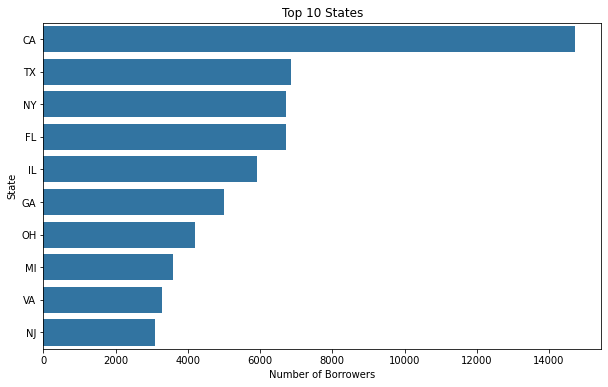

In [8]:
fig_size(10,6)

state_order = prosper_loan.BorrowerState.value_counts().iloc[:10].index
sb.countplot(data= prosper_loan, y= 'BorrowerState', color= base_color, order= state_order)
chart_label('Top 10 States', 'Number of Borrowers', 'State');

## (Visualization 2)
### Percentage of Home Owners to Non-Home Owners

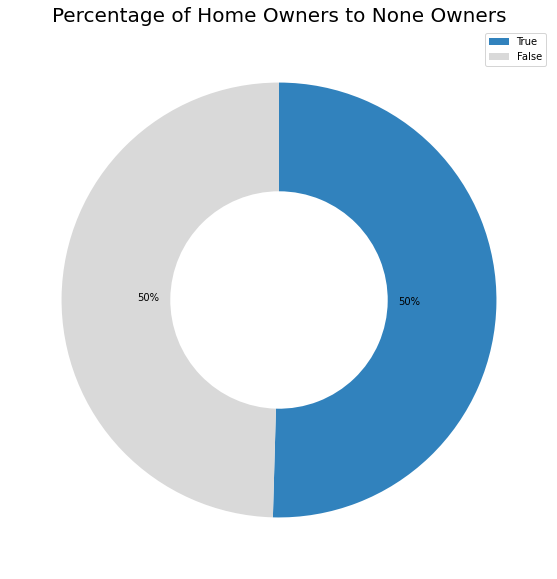

In [9]:

prosper_loan.IsBorrowerHomeowner.value_counts().plot(kind= 'pie', autopct= '%.0f%%', figsize= (10,10), startangle=90,
                                             counterclock=False, wedgeprops= {'width': 0.5}, labeldistance = None, 
                                             cmap=plt.get_cmap('tab20c'))

plt.ylabel("")
plt.legend()
plt.title('Percentage of Home Owners to None Owners', fontsize= 20);

> It can be observed that there is a 50:50 ratio of home owners to non-home owners among the borrowers.

## (Visualization 3)
### Distribution of Income Range among the Borrowers


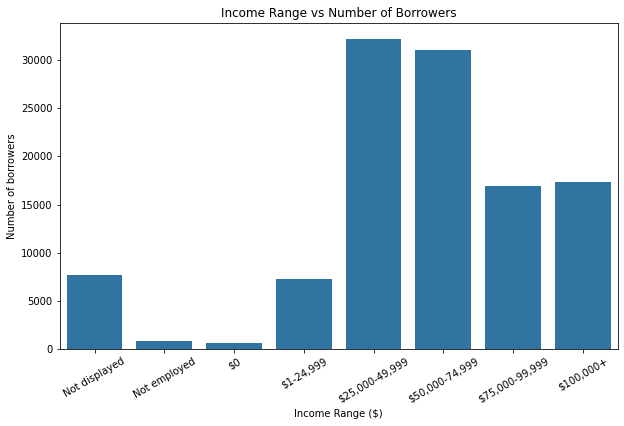

In [10]:
fig_size(10,6)
income_order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data= prosper_loan, x= 'IncomeRange', color= base_color, order= income_order)
chart_label('Income Range vs Number of Borrowers','Income Range ($)', 'Number of borrowers')
plt.xticks(rotation=30);

> People who earn between `$25,000- $75,000` make up the largest chunk of borrowers.

## (Visualization 4)
### (Relationship between income range and owning a house)

>Does income range determine whether or not a borrower owns a house or not?

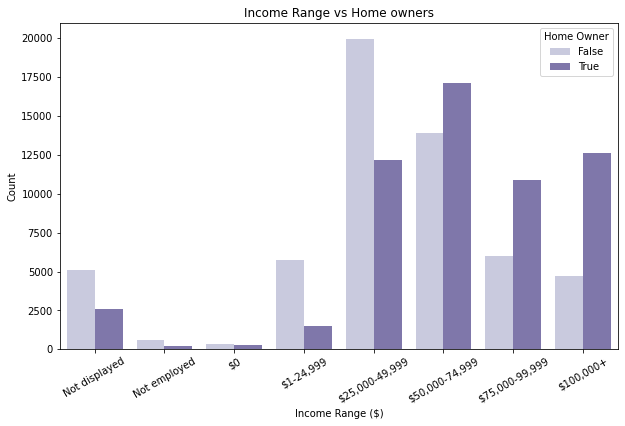

In [11]:
fig_size(10,6)

sb.countplot(data = prosper_loan, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Purples', order = income_order)
plt.legend(title= 'Home Owner')
chart_label('Income Range vs Home owners','Income Range ($)','Count')
plt.xticks(rotation=30);

From those earning more i.e 100k+, they are twice more likely to be Home owners and the chart shows that the higher the borrowers earn the more likely that they would be a Home owner, likewise the lesser the borrower earns the less likely that they would be a Home owner.

## GRACIAS

In [12]:
!jupyter nbconvert blessing_prosper_loan_slidedeck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook blessing_prosper_loan_slidedeck.ipynb to slides
[NbConvertApp] Writing 681541 bytes to blessing_prosper_loan_slidedeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\DELL\miniconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\DELL\miniconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\DELL\miniconda3\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "C:\Users\DELL\miniconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\DELL\miniconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filenam